In [ ]:
%pip install pacmap

For reference, the original authors apply it directly to the PCA
https://github.com/hyhuang00/scRNA-DR2020/tree/main

citation: https://doi.org/10.1038/s42003-022-03628-x

In [121]:
import scanpy as sc
import scvelo as scv #only importing for dev dataset
import pacmap

# PBMC

In [89]:
pbmc = sc.datasets.pbmc3k_processed()
#already HVG, normalized, transformed, scaled, and PCA

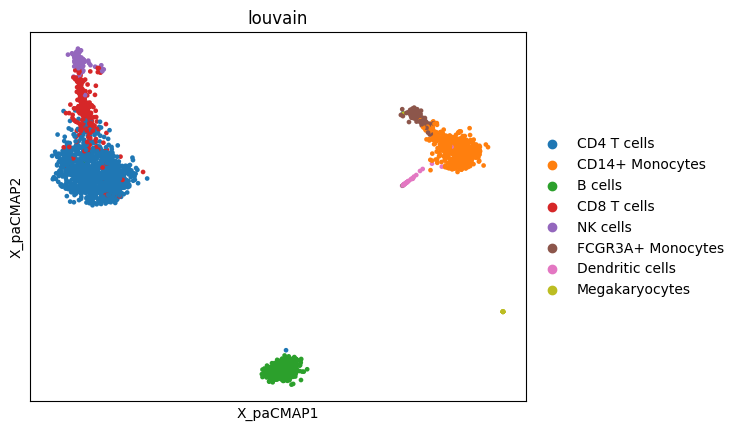

In [90]:
embedding = pacmap.PaCMAP() 
pbmc.obsm['X_paCMAP'] = embedding.fit_transform(pbmc.obsm['X_pca'])
sc.pl.embedding(pbmc, 'X_paCMAP', color = 'louvain')

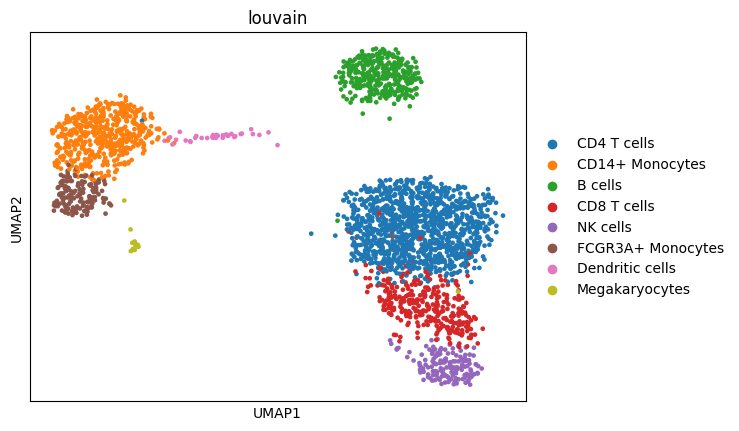

In [101]:
sc.pl.umap(pbmc, color = 'louvain') #compared to UMAP

# Developmental

In [96]:
panc = scv.datasets.pancreas()
sc.pp.filter_genes(adata, min_cells = 5)
sc.pp.normalize_total(panc)
sc.pp.log1p(panc)
sc.pp.highly_variable_genes(panc, subset=True)
sc.pp.scale(panc)
sc.tl.pca(panc, n_comps=50)

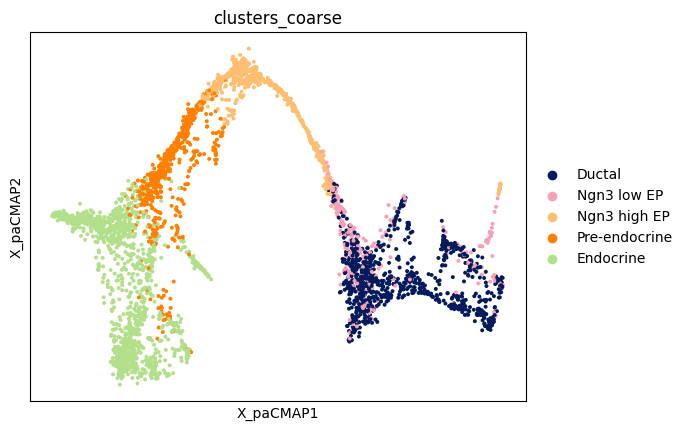

In [97]:
embedding = pacmap.PaCMAP() 
panc.obsm['X_paCMAP'] = embedding.fit_transform(panc.obsm['X_pca'])
sc.pl.embedding(panc, 'X_paCMAP', color = 'clusters_coarse')

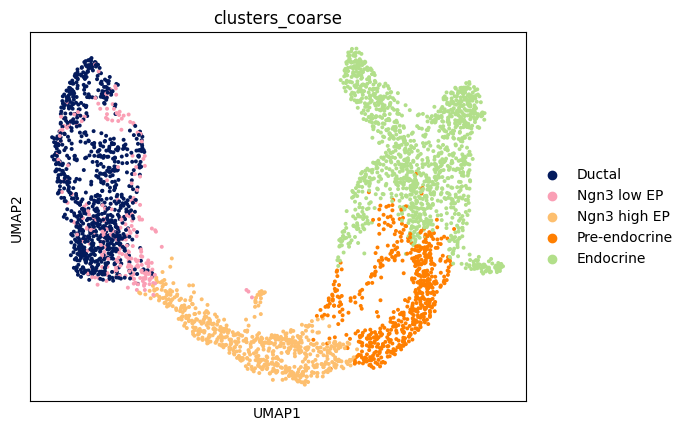

In [102]:
sc.pl.umap(panc, color = 'clusters_coarse')

# Example using external embedding with scvi. e.g., if you want to integrate multiple samples

In [98]:
import scvi
pdata = scv.datasets.pancreas()
sc.pp.filter_genes(pdata, min_cells = 5)
sc.pp.highly_variable_genes(pdata, n_top_genes = 2000, subset = True, flavor = 'seurat_v3')
scvi.model.SCVI.setup_anndata(pdata)
vae = scvi.model.SCVI(pdata)
vae.train() #my env must be broken, oh well, cpu is is

CUDA backend failed to initialize: Found CUDA version 12000, but JAX was built against version 12020, which is newer. The copy of CUDA that is installed must be at least as new as the version against which JAX was built. (Set TF_CPP_MIN_LOG_LEVEL=0 and rerun for more info.)
GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs


Epoch 400/400: 100%|█| 400/400 [02:11<00:00,  3.04it/s, v_num=1, train_loss_step

`Trainer.fit` stopped: `max_epochs=400` reached.


Epoch 400/400: 100%|█| 400/400 [02:11<00:00,  3.05it/s, v_num=1, train_loss_step


In [99]:
pdata.obsm['X_scVI'] = vae.get_latent_representation()

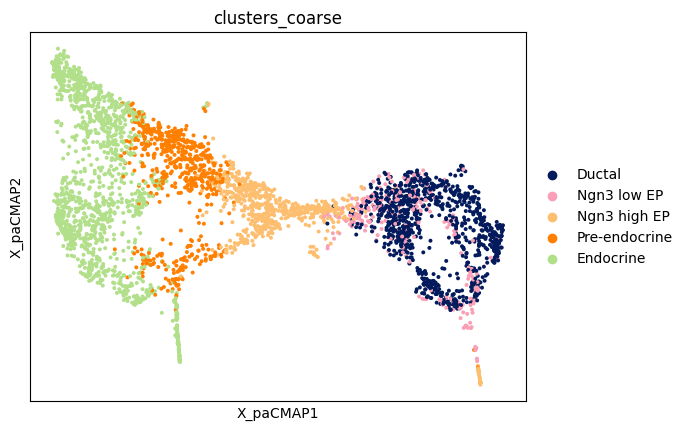

In [100]:
embedding = pacmap.PaCMAP() 
pdata.obsm['X_paCMAP'] = embedding.fit_transform(pdata.obsm['X_scVI'])
sc.pl.embedding(pdata, 'X_paCMAP', color = 'clusters_coarse')

## nicer plots for tweet

In [112]:
import matplotlib.pyplot as plt

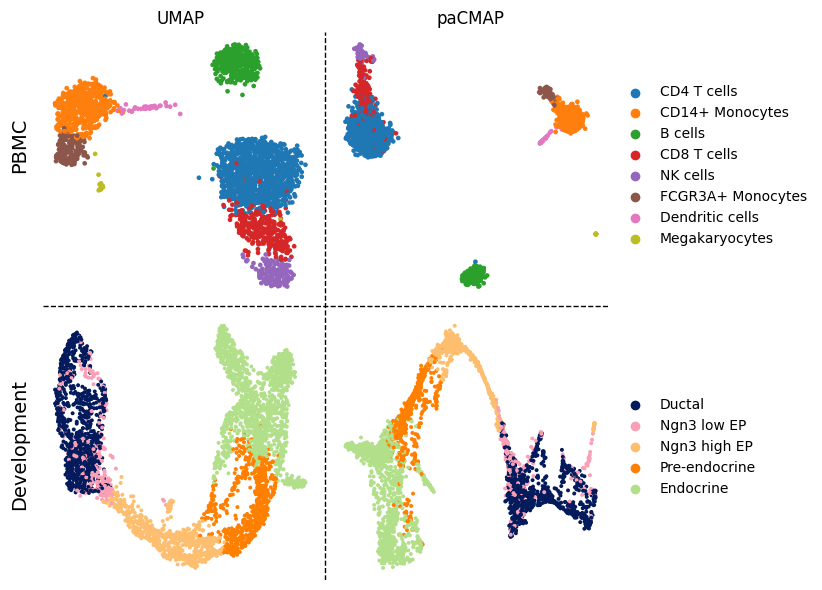

In [138]:
fig, axs = plt.subplots(2, 2, figsize=(8, 6))



sc.pl.umap(pbmc, color = 'louvain', ax=axs[0, 0], show=False, title = 'UMAP', legend_loc = None, frameon=False) 
sc.pl.embedding(pbmc, 'X_paCMAP', color = 'louvain', ax=axs[0, 1], show=False, title = 'paCMAP', frameon=False)

sc.pl.umap(panc, color = 'clusters_coarse', ax=axs[1, 0], show=False, title = '', legend_loc = None, frameon=False)
sc.pl.embedding(panc, 'X_paCMAP', color = 'clusters_coarse', ax=axs[1, 1], show=False, title = '', frameon=False)

fig.text(-0.01, 0.75, 'PBMC', ha='center', va='center', fontsize=14,  rotation=90)
fig.text(-0.01, 0.25, 'Development', ha='center', va='center', fontsize=14, rotation=90)



#dashed lines
fig.add_subplot(111, frame_on=False)
plt.tick_params(left=False, right=False, top=False, bottom=False, labelleft=False, labelbottom=False)
plt.axhline(y=0.5, color='k', linestyle='--', linewidth=1, xmin=0, xmax=1)
plt.axvline(x=0.5, color='k', linestyle='--', linewidth=1, ymin=0, ymax=1)


plt.tight_layout()

plt.savefig('plots.png', dpi = 300, bbox_inches = 'tight')

plt.show()